In [1]:
import math
from datetime import datetime
from pathlib import Path
from typing import List, Tuple, Union
from random import choice

import matplotlib.pyplot as plt

import FaceWrapper

In [2]:
def display_images(*images, gray=False):
    """
    Display any number of images in a roughly square grid.

    Args:
        *images: A variable number of image arrays.
        gray (bool): If True, displays all images in grayscale.
    """
    if len(images) == 1 and isinstance(images[0], (list, tuple)):
        images = images[0]
    n = len(images)
    cols = math.ceil(math.sqrt(n))
    rows = math.ceil(n / cols)

    plt.figure(figsize=(5 * cols, 5 * rows))
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        if gray:
            plt.imshow(img, cmap="gray")
        else:
            plt.imshow(img)
        plt.axis("off")
    plt.tight_layout()
    plt.show()


In [3]:
# Get sample images for CNN model
test_im_files = sorted(
    Path("data/prashantarorat/facial-key-point-data/images").glob("04*.png")
)
len(test_im_files)

1000

In [4]:
VIDEO_LENGTH = 1.0  # seconds
FPS = 10
VIDEO_FRAME_COUNT = int(VIDEO_LENGTH * FPS)

In [5]:
output_path = Path("output/videos")
output_path.mkdir(parents=True, exist_ok=True)

print(output_path)

output/videos


In [6]:
def create_face_morph(
    face1_path: Union[Path, str],
    face2_path: Union[Path, str],
    align: bool = False,
    add_background_points: bool = True,
    frame_count: int = VIDEO_FRAME_COUNT,
    fps: int = FPS,
    before_and_after: int = -1,
    display: bool = True,
    pad_frames: int = int(1 * FPS),
) -> Tuple[Path, List]:
    # Ensure paths are Path objects
    face1_path = Path(face1_path)
    face2_path = Path(face2_path)

    parameters = {
        "face1": face1_path,
        "face2": face2_path,
        "align": align,
        "addBackgroundPoints": add_background_points,
    }

    sequence = FaceWrapper.ParappaTheFaceWrappa(parameters)
    sequence.setup_faces()

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Face 1")
    plt.axis("off")
    plt.imshow(sequence.face1.imc1)
    plt.subplot(1, 2, 2)
    plt.title("Face 2")
    plt.axis("off")
    plt.imshow(sequence.face2.imc1)
    plt.show()

    # Create morph with head interpolation
    images = sequence.typical_interpolate_morph(
        before_and_after=before_and_after, timelapse=frame_count
    )

    # Generate output filename with timestamp
    output_file = output_path / f"morph_{datetime.now().strftime('%Y%m%d_%H%M%S')}.mp4"
    sequence.convert_to_video(
        images,
        fps,
        str(output_file),
        pad_beginning_frames=pad_frames,
        pad_end_frames=pad_frames,
    )

    if display:
        display_images(images)

    return output_file, images

getting landmarks from CNN model
getting landmarks from CNN model


I0000 00:00:1746934646.376473 113585914 service.cc:146] XLA service 0x34180fa80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746934646.376499 113585914 service.cc:154]   StreamExecutor device (0): Host, Default Version
2025-05-10 23:37:26.379959: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746934646.451614 113585914 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


images are the same size, skipping resizing
getting landmarks from CNN model
getting landmarks from CNN model


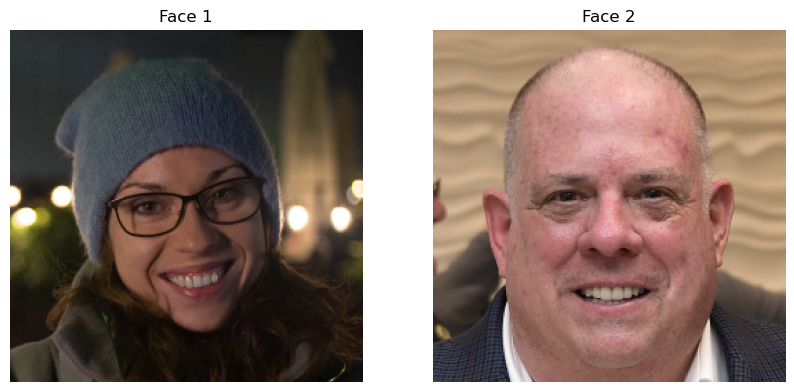

100%|██████████| 10/10 [00:25<00:00,  2.53s/it]


self points:  (70, 2)


100%|██████████| 6/6 [00:16<00:00,  2.74s/it]
OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


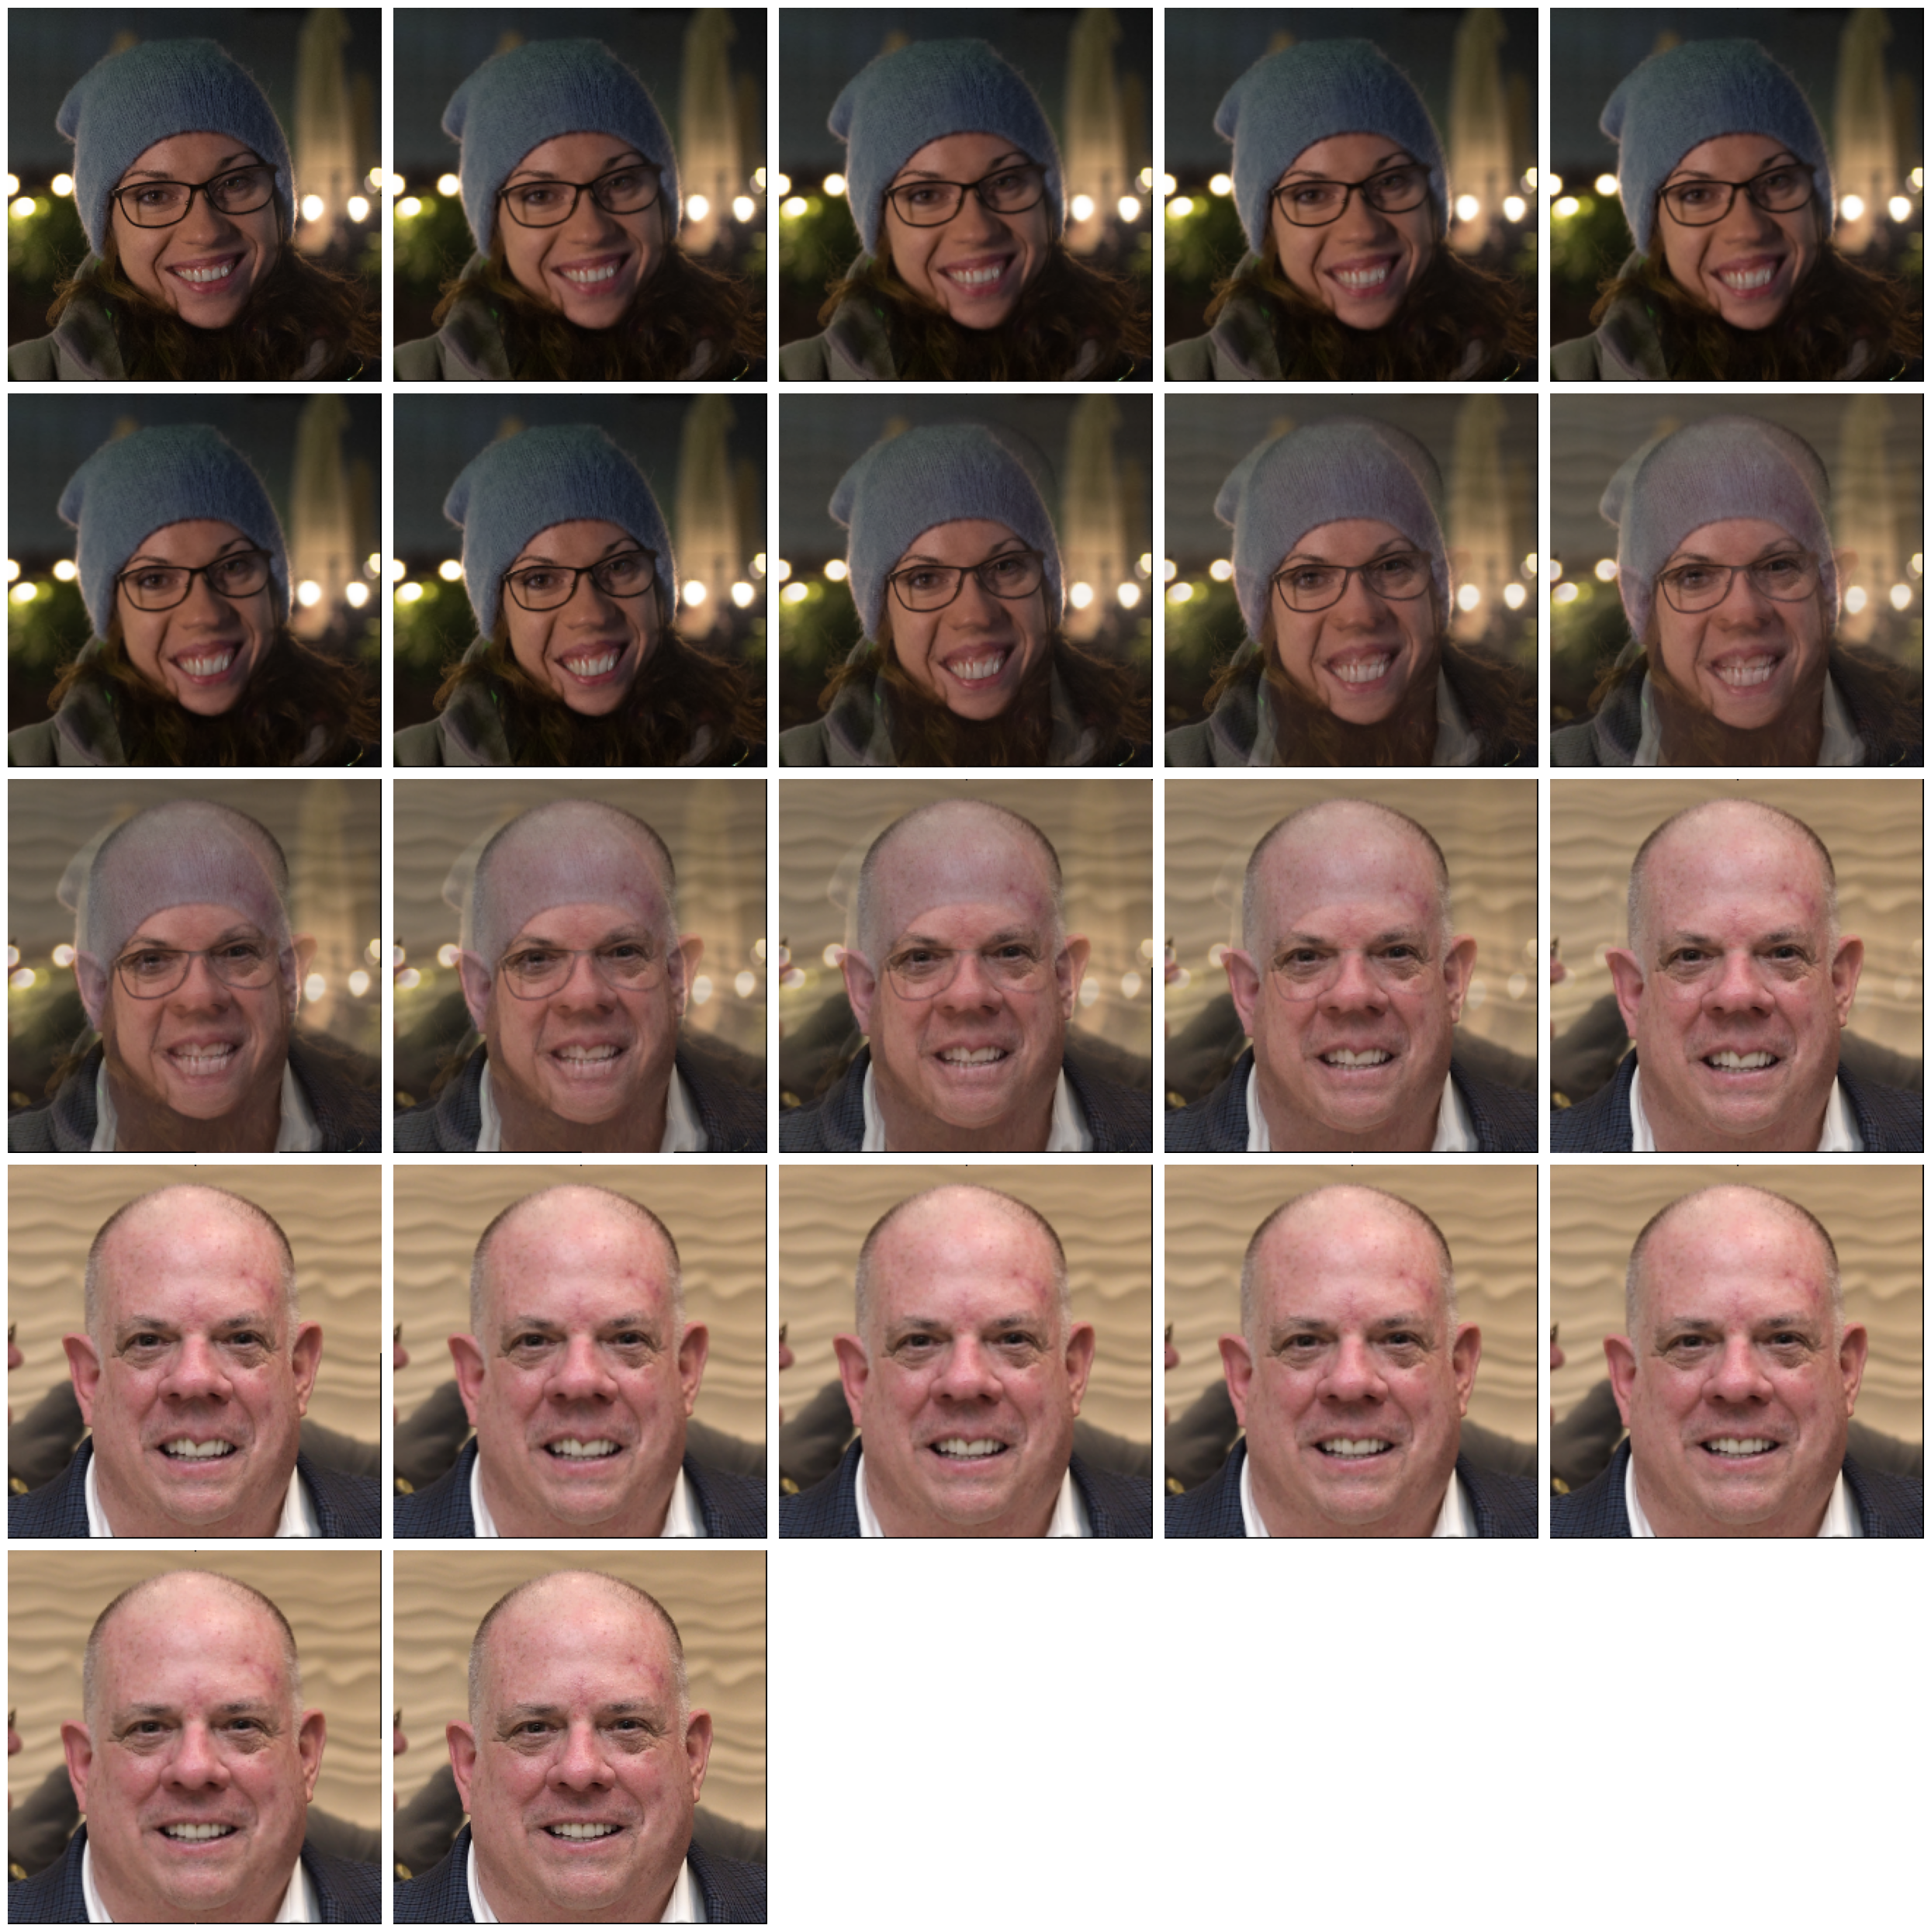

In [7]:
f, ims = create_face_morph(
    face1_path=test_im_files[0],
    face2_path=test_im_files[1],
)